In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,RobustScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
validation_df = pd.read_csv("Data/Validation.csv")
validation_df.tail()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15405,Hyundai Grand,Hyundai,Grand,5,9229,Dealer,Petrol,Manual,18.90,1197,82.00,5,545000
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [3]:
#Encoding Categorical Var
Categorical_features = validation_df.iloc[:,[0,1,2,5,6,7]]
Encode = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
array = Encode.fit_transform(Categorical_features)
validation_encode_DF = pd.DataFrame(array,columns=Encode.get_feature_names_out(Categorical_features.columns))
validation_df = pd.concat([validation_encode_DF.astype("int"),validation_df.drop(columns=["car_name","brand","model","seller_type","fuel_type","transmission_type"])],axis=1).reset_index(drop=True)

In [4]:
# Extracting Column Names
cnt = 0
lst = []
for i in validation_df.columns.tolist():
    if(cnt!=283):
        lst.append(i.split("_")[-1])
        cnt+=1
    else:
        break        

In [5]:
#Renaming Columns 
cnt = 0
for i in validation_df.columns.tolist():
    if(cnt==283):
        break
    validation_df.rename(columns={i:lst[cnt]},inplace=True)
    cnt+=1    

In [6]:
copy = validation_df.copy()

In [7]:
validation_df

,Audi A4,Audi A6,Audi A8,Audi Q7,BMW 3,BMW 5,BMW 6,BMW 7,BMW X1,BMW X3,...,Petrol,Automatic,Manual,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,9,120000,19.70,796,46.30,5,120000
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,5,20000,18.90,1197,82.00,5,550000
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,11,60000,17.00,1197,80.00,5,215000
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,9,37000,20.92,998,67.10,5,226000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,6,30000,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15405,0,0,0,0,0,0,0,0,0,0,...,1,0,1,5,9229,18.90,1197,82.00,5,545000
15406,0,0,0,0,0,0,0,0,0,0,...,1,0,1,9,10723,19.81,1086,68.05,5,250000
15407,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2,18000,17.50,1373,91.10,7,925000
15408,0,0,0,0,0,0,0,0,0,0,...,0,0,1,6,67000,21.14,1498,103.52,5,425000


C:\Users\lipun\AppData\Local\Temp\ipykernel_29068\3501990877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(validation_df["seats"])


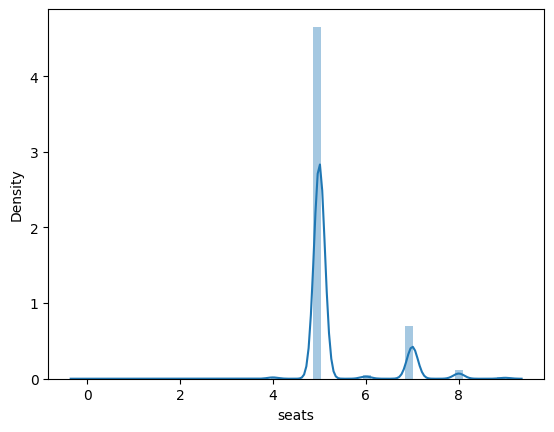

In [29]:
sns.distplot(validation_df["seats"])
plt.show()

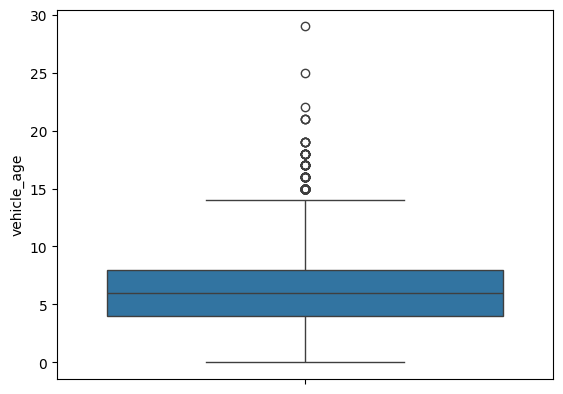

In [30]:
sns.boxplot(validation_df["vehicle_age"])
plt.show()

In [8]:
#Normalizing Robust Scaler
Robust = RobustScaler()
validation_df.iloc[:,[283,284,285,286,287]] = Robust.fit_transform(validation_df.iloc[:,[283,284,285,286,287]])

C:\Users\lipun\AppData\Local\Temp\ipykernel_23156\1240532646.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.75 -0.25  1.25 ... -1.    0.   -1.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  validation_df.iloc[:,[283,284,285,286,287]] = Robust.fit_transform(validation_df.iloc[:,[283,284,285,286,287]])
C:\Users\lipun\AppData\Local\Temp\ipykernel_23156\1240532646.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.75  -0.75   0.25  ... -0.8    0.425 -0.925]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  validation_df.iloc[:,[283,284,285,286,287]] = Robust.fit_transform(validation_df.iloc[:,[283,284,285,286,287]])
C:\Users\lipun\AppData\Local\Temp\ipykernel_23156\1240532646.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated an

In [9]:
#Standard Scaler
StdScaler = StandardScaler()
validation_df.iloc[:,[288]] = StdScaler.fit_transform(validation_df.iloc[:,[288]])

C:\Users\lipun\AppData\Local\Temp\ipykernel_23156\3758586225.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.402931   -0.402931   -0.402931   ...  2.07380084 -0.402931
 -0.402931  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  validation_df.iloc[:,[288]] = StdScaler.fit_transform(validation_df.iloc[:,[288]])


In [10]:
validation_df

,Audi A4,Audi A6,Audi A8,Audi Q7,BMW 3,BMW 5,BMW 6,BMW 7,BMW X1,BMW X3,...,Petrol,Automatic,Manual,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0.75,1.750000,0.005263,-1.174026,-0.974596,-0.402931,120000
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,-0.25,-0.750000,-0.135088,-0.132468,-0.150115,-0.402931,550000
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1.25,0.250000,-0.468421,-0.132468,-0.196305,-0.402931,215000
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0.75,-0.325000,0.219298,-0.649351,-0.494226,-0.402931,226000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.00,-0.500000,0.543860,0.649351,0.233025,-0.402931,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15405,0,0,0,0,0,0,0,0,0,0,...,1,0,1,-0.25,-1.019275,-0.135088,-0.132468,-0.150115,-0.402931,545000
15406,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0.75,-0.981925,0.024561,-0.420779,-0.472286,-0.402931,250000
15407,0,0,0,0,0,0,0,0,0,0,...,1,0,1,-1.00,-0.800000,-0.380702,0.324675,0.060046,2.073801,925000
15408,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.00,0.425000,0.257895,0.649351,0.346882,-0.402931,425000


In [11]:
validation_df.to_csv("transform.csv",index=False)
copy.to_csv("transform_org.csv",index=False)

<p><strong><h1>Final Report: DataTransformation</h1></strong></p>
<p>
    <b>Categorical Features : </b>Found Categorical Variables Such As "Car_name","brand","model","seller_type","fuel_type","transmission_type".
    Categorical Features Are Encoded using Feature Engineering - OneHotEncoding<br>
    <b>DataTypes : </b> Float Dtypes Found After Encoding, they were TypeCast to Int for Convenient Use.<br>
    <b>Renaming Columns : </b>Inconsistencies Columns Are Found , Renamed To improve Clarity.
    <li>Found Some Numerical Features Like <b>"vehicle_age","km_driven","mileage","engine","max_power","seats"</b></li> Among these features, 'seats' was identified as less prone to outliers, so it was normalized using StandardScaler. Other features were normalized using RobustScaler due to presence of outliers.<br>
    <li>A copy of original data is retained for further use in Tree Algorithms like RandomForest and DecisionTrees, which do not require normalization</li>
</p>